In [1]:
import pandas as pd

### Tiền xử lý transaction history

In [259]:
df = pd.read_csv(r"D:\Datasets\Data_Final\lsgd.csv", low_memory=False, index_col=0)
df.head()

company_name transaction_date  closing_price  \
stock_code                                                             
VIC         Tập đoàn VINGROUP - CTCP       2025-03-18           51.3   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-17           52.1   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-14           52.2   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-13           51.4   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-12           48.1   

            adjusted_price  change  matched_volume  matched_value  \
stock_code                                                          
VIC                    NaN    -0.8         6017000         312.07   
VIC                    NaN    -0.1         6497300         337.13   
VIC                    NaN     0.8         8422600         440.87   
VIC                    NaN     3.3        16415000         833.85   
VIC                    NaN     0.8         7003400         336.19   

            negotiated_volume  negotiated_value  opening_price  highest_price  \
stock_code                                                                      
VIC                   1923099            100.19          52.10          52.70   
VIC                    134000              7.04          52.50          52.70   
VIC                         0              0.00          51.80          52.80   
VIC                     86000              4.21          48.30          51.40   
VIC                         0              0.00          47.35          48.25   

            lowest_price  percent         Ngành  
stock_code                                       
VIC                51.10    -1.54  Bất Động Sản  
VIC                50.80    -0.19  Bất Động Sản  
VIC                51.40     1.56  Bất Động Sản  
VIC                47.50     6.86  Bất Động Sản  
VIC                47.35     1.69  Bất Động Sản

In [260]:
df.shape

(92746, 14)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92746 entries, VIC to LPB
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       92746 non-null  object 
 1   transaction_date   92746 non-null  object 
 2   closing_price      92746 non-null  float64
 3   adjusted_price     80455 non-null  float64
 4   change             92746 non-null  float64
 5   matched_volume     92746 non-null  int64  
 6   matched_value      92746 non-null  float64
 7   negotiated_volume  92746 non-null  int64  
 8   negotiated_value   92746 non-null  float64
 9   opening_price      92746 non-null  float64
 10  highest_price      92746 non-null  float64
 11  lowest_price       92746 non-null  float64
 12  percent            92746 non-null  float64
 13  Ngành              92746 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 10.6+ MB


Thay những giá trị bị thiếu của các cột ở bảng tự doanh = 0. Vì chỉ có một số ít các công ty tự doanh. 

In [262]:
# df[['proprietary_buy_volume', 'proprietary_buy_value', 
#     'proprietary_sell_volume', 'proprietary_sell_value', 
#     'proprietary_net_volume', 'proprietary_net_value']] = df[
#     ['proprietary_buy_volume', 'proprietary_buy_value', 
#      'proprietary_sell_volume', 'proprietary_sell_value', 
#      'proprietary_net_volume', 'proprietary_net_value']
# ].fillna(0)

In [263]:
df['stock_code'] = df.index
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce', dayfirst=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29476\2469400054.py:2: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



In [264]:
df.dropna(subset=['transaction_date'], inplace=True) #Có một ngày vẫn bị lỗi nên cần xóa đi.

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92746 entries, VIC to LPB
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_name       92746 non-null  object        
 1   transaction_date   92746 non-null  datetime64[ns]
 2   closing_price      92746 non-null  float64       
 3   adjusted_price     80455 non-null  float64       
 4   change             92746 non-null  float64       
 5   matched_volume     92746 non-null  int64         
 6   matched_value      92746 non-null  float64       
 7   negotiated_volume  92746 non-null  int64         
 8   negotiated_value   92746 non-null  float64       
 9   opening_price      92746 non-null  float64       
 10  highest_price      92746 non-null  float64       
 11  lowest_price       92746 non-null  float64       
 12  percent            92746 non-null  float64       
 13  Ngành              92746 non-null  object        
 14  stock_code 

In [266]:
cols_to_convert = ['closing_price', 'adjusted_price', 'matched_volume', 
                   'matched_value', 'negotiated_volume', 'negotiated_value', 'opening_price',
                   'highest_price', 'lowest_price',
                  ]
len(cols_to_convert)

9

In [267]:
df.head(30)

company_name transaction_date  closing_price  \
stock_code                                                             
VIC         Tập đoàn VINGROUP - CTCP       2025-03-18          51.30   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-17          52.10   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-14          52.20   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-13          51.40   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-12          48.10   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-11          47.30   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-10          47.30   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-07          45.30   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-06          42.35   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-05          42.25   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-04          41.95   
VIC         Tập đoàn VINGROUP - CTCP       2025-03-03          42.05   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-28          41.20   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-27          41.05   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-26          41.00   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-25          40.70   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-24          40.60   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-21          40.65   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-20          40.95   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-19          40.40   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-18          40.20   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-17          40.10   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-14          40.25   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-13          40.25   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-12          39.90   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-11          39.95   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-10          40.00   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-07          40.65   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-06          40.45   
VIC         Tập đoàn VINGROUP - CTCP       2025-02-05          40.05   

            adjusted_price  change  matched_volume  matched_value  \
stock_code                                                          
VIC                    NaN   -0.80         6017000         312.07   
VIC                    NaN   -0.10         6497300         337.13   
VIC                    NaN    0.80         8422600         440.87   
VIC                    NaN    3.30        16415000         833.85   
VIC                    NaN    0.80         7003400         336.19   
VIC                    NaN    0.00         5692400         267.67   
VIC                    NaN    2.00         9904400         465.38   
VIC                    NaN    2.95        11502700         511.41   
VIC                    NaN    0.10         2628200         111.51   
VIC                    NaN    0.30         2907700         123.19   
VIC                    NaN   -0.10         3056500         128.80   
VIC                    NaN    0.85         2857500         119.85   
VIC                    NaN    0.15         2771000         114.09   
VIC                    NaN    0.05         1441600          59.03   
VIC                    NaN    0.30         1364900          55.93   
VIC                    NaN    0.10         1793300          73.36   
VIC                    NaN   -0.05         1540100          62.35   
VIC                    NaN   -0.30         1332100          54.38   
VIC                    NaN    0.55         2936300         120.21   
VIC                    NaN    0.20         1574300          63.40   
VIC                    NaN    0.10         1200000          48.18   
VIC                    NaN   -0.15          851700          34.22   
VIC                    NaN    0.00          996500          40.

In [268]:
for col in cols_to_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92746 entries, VIC to LPB
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_name       92746 non-null  object        
 1   transaction_date   92746 non-null  datetime64[ns]
 2   closing_price      92746 non-null  float64       
 3   adjusted_price     80455 non-null  float64       
 4   change             92746 non-null  float64       
 5   matched_volume     92746 non-null  int64         
 6   matched_value      92746 non-null  float64       
 7   negotiated_volume  92746 non-null  int64         
 8   negotiated_value   92746 non-null  float64       
 9   opening_price      92746 non-null  float64       
 10  highest_price      92746 non-null  float64       
 11  lowest_price       92746 non-null  float64       
 12  percent            92746 non-null  float64       
 13  Ngành              92746 non-null  object        
 14  stock_code 

In [270]:
#df['foreign_ownership'] = df[col] = pd.to_numeric(df['foreign_ownership'].str.replace('%', '', regex=True), errors='coerce')

In [271]:
df.reset_index(drop=True, inplace=True)
df.sort_values(by=['stock_code', 'transaction_date'], ascending=[True, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

company_name transaction_date  closing_price  adjusted_price  \
0   Ngân hàng TMCP Á Châu       2006-11-21          135.0            5.72   
1   Ngân hàng TMCP Á Châu       2006-11-22          135.0            5.72   
2   Ngân hàng TMCP Á Châu       2006-11-23          143.0            6.06   
3   Ngân hàng TMCP Á Châu       2006-11-27          142.0            6.02   
4   Ngân hàng TMCP Á Châu       2006-11-28          142.0            6.02   
5   Ngân hàng TMCP Á Châu       2006-12-01          130.0            5.51   
6   Ngân hàng TMCP Á Châu       2006-12-06          126.0            5.34   
7   Ngân hàng TMCP Á Châu       2006-12-07          134.5            5.70   
8   Ngân hàng TMCP Á Châu       2006-12-08          141.0            5.98   
9   Ngân hàng TMCP Á Châu       2006-12-11          141.0            5.98   
10  Ngân hàng TMCP Á Châu       2006-12-13          140.0            5.93   
11  Ngân hàng TMCP Á Châu       2006-12-14          140.1            5.94   
12  Ngân hàng TMCP Á Châu       2006-12-15          143.0            6.06   
13  Ngân hàng TMCP Á Châu       2006-12-18          144.0            6.10   
14  Ngân hàng TMCP Á Châu       2006-12-19          143.7            6.09   
15  Ngân hàng TMCP Á Châu       2006-12-20          144.5            6.12   
16  Ngân hàng TMCP Á Châu       2006-12-21          144.0            6.10   
17  Ngân hàng TMCP Á Châu       2006-12-22          139.5            5.91   
18  Ngân hàng TMCP Á Châu       2006-12-25          140.0            5.93   
19  Ngân hàng TMCP Á Châu       2006-12-26          145.0            6.15   

    change  matched_volume  matched_value  negotiated_volume  \
0     15.0           56500           7.37                  0   
1      4.8           62300           8.39                  0   
2      8.3           69900           9.68                  0   
3     -4.8           42400           6.23                  0   
4     -4.8           19800           2.84                  0   
5     -1.5           59300           7.77                  0   
6      3.8           81800          10.01                  0   
7     12.2           24200           3.23                  0   
8      7.6           48500           6.79                  0   
9      0.9           67600           9.75                  0   
10     1.1           70500           9.84                  0   
11     0.5           45600           6.41                  0   
12     2.3           56800           8.15                  0   
13     0.4           70400          10.18                  0   
14    -0.9           37400           5.38                  0   
15     0.5           57400           8.27                  0   
16    -0.1           44600           6.42                  0   
17    -4.4           41000           5.67                  0   
18     1.8           48400           6.63                  0   
19     7.9           34000           4.81                  0   

    negotiated_value  opening_price  highest_price  lowest_price  percent  \
0                0.0          120.0          150.0         119.0    12.50   
1                0.0          143.2          143.2         130.0     3.69   
2                0.0          145.0          145.0         130.0     6.16   
3                0.0          146.8          161.4         135.0    -3.27   
4                0.0          150.0          150.0         140.0    -3.27   
5                0.0          133.0          133.0         130.0    -1.14   
6                0.0          120.0          126.0         120.0     3.11   
7                0.0          125.0          134.5         125.0     9.98   
8                0.0          145.0          145.0         136.0     5.70   
9                0.0          154.0          154.0         141.0     0.64   
10               0.0          140.0          143.0         136.0     0.79   
11               0.0          140.0          142.9         139.0     0.36   
12               0.0          142.0          145.

In [272]:
df[df['closing_price'].isna()]

Empty DataFrame
Columns: [company_name, transaction_date, closing_price, adjusted_price, change, matched_volume, matched_value, negotiated_volume, negotiated_value, opening_price, highest_price, lowest_price, percent, Ngành, stock_code]
Index: []

In [273]:
df.isna().sum()

company_name             0
transaction_date         0
closing_price            0
adjusted_price       12291
change                   0
matched_volume           0
matched_value            0
negotiated_volume        0
negotiated_value         0
opening_price            0
highest_price            0
lowest_price             0
percent                  0
Ngành                    0
stock_code               0
dtype: int64

In [274]:
df = df.drop(columns = ['adjusted_price','Ngành','company_name'])
df.isna().sum()

transaction_date     0
closing_price        0
change               0
matched_volume       0
matched_value        0
negotiated_volume    0
negotiated_value     0
opening_price        0
highest_price        0
lowest_price         0
percent              0
stock_code           0
dtype: int64

-------------------------

In [275]:
# his_cost = df[['stock_code', 'transaction_date', 'closing_price', 'change_hisCost', 'matched_volume', 'matched_value', 'negotiated_volume',
# 'negotiated_value',
# 'opening_price',
# 'highest_price',
# 'lowest_price']]
his_cost = df

In [276]:
his_cost=his_cost[~his_cost['closing_price'].isna()]

In [277]:
his_cost.head()

transaction_date  closing_price  change  matched_volume  matched_value  \
0       2006-11-21          135.0    15.0           56500           7.37   
1       2006-11-22          135.0     4.8           62300           8.39   
2       2006-11-23          143.0     8.3           69900           9.68   
3       2006-11-27          142.0    -4.8           42400           6.23   
4       2006-11-28          142.0    -4.8           19800           2.84   

   negotiated_volume  negotiated_value  opening_price  highest_price  \
0                  0               0.0          120.0          150.0   
1                  0               0.0          143.2          143.2   
2                  0               0.0          145.0          145.0   
3                  0               0.0          146.8          161.4   
4                  0               0.0          150.0          150.0   

   lowest_price  percent stock_code  
0         119.0    12.50        ACB  
1         130.0     3.69        ACB  
2         130.0     6.16        ACB  
3         135.0    -3.27        ACB  
4         140.0    -3.27        ACB

In [278]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92746 entries, 0 to 92745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   92746 non-null  datetime64[ns]
 1   closing_price      92746 non-null  float64       
 2   change             92746 non-null  float64       
 3   matched_volume     92746 non-null  int64         
 4   matched_value      92746 non-null  float64       
 5   negotiated_volume  92746 non-null  int64         
 6   negotiated_value   92746 non-null  float64       
 7   opening_price      92746 non-null  float64       
 8   highest_price      92746 non-null  float64       
 9   lowest_price       92746 non-null  float64       
 10  percent            92746 non-null  float64       
 11  stock_code         92746 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 8.5+ MB


In [279]:
his_cost = his_cost.drop_duplicates()

In [280]:
his_cost.describe()

transaction_date  closing_price        change  \
count                          92746   92746.000000  92746.000000   
mean   2017-12-15 21:06:53.852888576      36.874797      0.015394   
min              2006-11-21 00:00:00       2.100000    -37.700000   
25%              2014-02-07 00:00:00      15.100000     -0.200000   
50%              2018-09-07 00:00:00      25.500000      0.000000   
75%              2022-02-10 00:00:00      46.100000      0.250000   
max              2025-03-19 00:00:00     665.000000     34.600000   
std                              NaN      36.281955      1.446968   

       matched_volume  matched_value  negotiated_volume  negotiated_value  \
count    9.274600e+04   92746.000000       9.274600e+04      92746.000000   
mean     1.799281e+06      59.650153       2.776879e+05         10.074131   
min      0.000000e+00       0.000000       0.000000e+00          0.000000   
25%      5.000000e+03       0.080000       0.000000e+00          0.000000   
50%      2.215100e+05       7.390000       0.000000e+00          0.000000   
75%      1.777802e+06      59.800000       8.000000e+00          0.000000   
max      7.658340e+07    5448.350000       4.149396e+08      30716.660000   
std      3.895112e+06     140.494858       2.658530e+06        143.976629   

       opening_price  highest_price  lowest_price       percent  
count   92746.000000   92746.000000  92746.000000  92746.000000  
mean       36.865211      37.316882     36.396039      0.080519  
min         0.000000       0.000000      0.000000    -40.000000  
25%        15.100000      15.300000     14.900000     -0.900000  
50%        25.500000      25.800000     25.100000      0.000000  
75%        46.100000      46.800000     45.600000      0.970000  
max       665.000000     672.000000    665.000000     48.960000  
std        36.315907      36.704807     35.870991      2.896140

In [281]:
his_cost['change']

0        15.00
1         4.80
2         8.30
3        -4.80
4        -4.80
         ...  
92741     0.00
92742     0.00
92743     0.05
92744     0.00
92745    -0.10
Name: change, Length: 92746, dtype: float64

In [282]:
# his_cost[['change', 'percent']] = his_cost['change_hisCost'].str.extract(r"([-\d.]+)\(([-\d.]+) %\)")

# his_cost['change'] = his_cost['change'].astype(float)
# his_cost['percent'] = his_cost['percent'].astype(float)

In [283]:
his_cost

transaction_date  closing_price  change  matched_volume  matched_value  \
0           2006-11-21         135.00   15.00           56500           7.37   
1           2006-11-22         135.00    4.80           62300           8.39   
2           2006-11-23         143.00    8.30           69900           9.68   
3           2006-11-27         142.00   -4.80           42400           6.23   
4           2006-11-28         142.00   -4.80           19800           2.84   
...                ...            ...     ...             ...            ...   
92741       2025-03-13          10.15    0.00            1500           0.02   
92742       2025-03-14          10.15    0.00               0           0.00   
92743       2025-03-17          10.20    0.05            4200           0.04   
92744       2025-03-18          10.20    0.00             100           0.00   
92745       2025-03-19          10.10   -0.10            3100           0.03   

       negotiated_volume  negotiated_value  opening_price  highest_price  \
0                      0               0.0         120.00         150.00   
1                      0               0.0         143.20         143.20   
2                      0               0.0         145.00         145.00   
3                      0               0.0         146.80         161.40   
4                      0               0.0         150.00         150.00   
...                  ...               ...            ...            ...   
92741                  0               0.0          10.05          10.15   
92742                  0               0.0          10.15          10.15   
92743                  0               0.0           9.90          10.20   
92744                  0               0.0          10.20          10.20   
92745                  0               0.0          10.10          10.10   

       lowest_price  percent stock_code  
0            119.00    12.50        ACB  
1            130.00     3.69        ACB  
2            130.00     6.16        ACB  
3            135.00    -3.27        ACB  
4            140.00    -3.27        ACB  
...             ...      ...        ...  
92741         10.00     0.00        VTB  
92742         10.15     0.00        VTB  
92743          9.90     0.49        VTB  
92744         10.20     0.00        VTB  
92745         10.10    -0.98        VTB  

[92746 rows x 12 columns]

In [284]:
#his_cost.drop(columns=['change_hisCost'], inplace=True)

In [285]:
#his_cost.to_csv(r'/home/hamornic/FinalXXX/DataScraped/Transaction History/Processed Data/History-Cost.csv', index=False, encoding='utf-8-sig')

In [286]:
his_cost

transaction_date  closing_price  change  matched_volume  matched_value  \
0           2006-11-21         135.00   15.00           56500           7.37   
1           2006-11-22         135.00    4.80           62300           8.39   
2           2006-11-23         143.00    8.30           69900           9.68   
3           2006-11-27         142.00   -4.80           42400           6.23   
4           2006-11-28         142.00   -4.80           19800           2.84   
...                ...            ...     ...             ...            ...   
92741       2025-03-13          10.15    0.00            1500           0.02   
92742       2025-03-14          10.15    0.00               0           0.00   
92743       2025-03-17          10.20    0.05            4200           0.04   
92744       2025-03-18          10.20    0.00             100           0.00   
92745       2025-03-19          10.10   -0.10            3100           0.03   

       negotiated_volume  negotiated_value  opening_price  highest_price  \
0                      0               0.0         120.00         150.00   
1                      0               0.0         143.20         143.20   
2                      0               0.0         145.00         145.00   
3                      0               0.0         146.80         161.40   
4                      0               0.0         150.00         150.00   
...                  ...               ...            ...            ...   
92741                  0               0.0          10.05          10.15   
92742                  0               0.0          10.15          10.15   
92743                  0               0.0           9.90          10.20   
92744                  0               0.0          10.20          10.20   
92745                  0               0.0          10.10          10.10   

       lowest_price  percent stock_code  
0            119.00    12.50        ACB  
1            130.00     3.69        ACB  
2            130.00     6.16        ACB  
3            135.00    -3.27        ACB  
4            140.00    -3.27        ACB  
...             ...      ...        ...  
92741         10.00     0.00        VTB  
92742         10.15     0.00        VTB  
92743          9.90     0.49        VTB  
92744         10.20     0.00        VTB  
92745         10.10    -0.98        VTB  

[92746 rows x 12 columns]

In [287]:
df_monthly = df.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='ME')  
]).agg({
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [288]:
df_monthly

stock_code transaction_date closing_price             matched_volume  \
                                           sum        mean            sum   
0           ACB       2006-11-30        697.00  139.400000         250900   
1           ACB       2006-12-31       2543.60  141.311111        1028100   
2           ACB       2007-01-31       3790.60  172.300000        1611200   
3           ACB       2007-02-28       2913.10  208.078571        1061100   
4           ACB       2007-03-31       5821.70  264.622727        2277100   
...         ...              ...           ...         ...            ...   
4503        VTB       2024-11-30        221.50   10.547619          45400   
4504        VTB       2024-12-31        239.55   10.888636         384500   
4505        VTB       2025-01-31        169.50    9.970588          78400   
4506        VTB       2025-02-28        192.32   10.122105          43700   
4507        VTB       2025-03-31        131.65   10.126923          16700   

                     
               mean  
0      50180.000000  
1      57116.666667  
2      73236.363636  
3      75792.857143  
4     103504.545455  
...             ...  
4503    2161.904762  
4504   17477.272727  
4505    4611.764706  
4506    2300.000000  
4507    1284.615385  

[4508 rows x 6 columns]

In [289]:
df_quarterly = df.groupby([  
    'stock_code',  
    pd.Grouper(key='transaction_date', freq='QE')  
]).agg({  
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [290]:
df_quarterly

stock_code transaction_date closing_price             matched_volume  \
                                           sum        mean            sum   
0           ACB       2006-12-31       3240.60  140.895652        1279000   
1           ACB       2007-03-31      12525.40  215.955172        4949400   
2           ACB       2007-06-30      11051.20  181.167213        5993900   
3           ACB       2007-09-30       7859.00  122.796875       10180700   
4           ACB       2007-12-31      11044.20  169.910769       19209600   
...         ...              ...           ...         ...            ...   
1512        VTB       2024-03-31        636.85   10.794068         493400   
1513        VTB       2024-06-30        643.90   10.555738         333900   
1514        VTB       2024-09-30        678.25   10.597656         117400   
1515        VTB       2024-12-31        700.20   10.609091         504000   
1516        VTB       2025-03-31        493.47   10.070816         138800   

                     
               mean  
0      55608.695652  
1      85334.482759  
2      98260.655738  
3     159073.437500  
4     295532.307692  
...             ...  
1512    8362.711864  
1513    5473.770492  
1514    1834.375000  
1515    7636.363636  
1516    2832.653061  

[1517 rows x 6 columns]

In [291]:
df_quarterly['stock_code'].unique().size

32

# Bộ lọc 1:
## Lọc mã cổ theo volume và lọc cổ phiếu theo vốn hóa thị trường:

###  vốn hóa thị trường:

In [294]:
market_cap = pd.read_csv(r"D:\Datasets\Data_Final\market_cap.csv", low_memory=False, index_col=0)
market_cap.head(5)

market_cap(Triệu đồng)
stock_code                       
VIC                    202,654.06
VHM                    198,182.63
BCM                     81,454.50
SSH                        37,800
VRE                     41,924.27

In [295]:
market_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, VIC to TMB
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   market_cap(Triệu đồng)  32 non-null     object
dtypes: object(1)
memory usage: 512.0+ bytes


In [ ]:
market_cap['stock_code'] = market_cap.index
market_cap.reset_index(drop=True, inplace=True)
market_cap.dropna
market_cap = market_cap.rename(columns={'market_cap(Triệu đồng)': 'value'})
market_cap['value'] = market_cap['value'].str.replace(',', '', regex=True).astype(float)
market_cap.head(5)

In [297]:
market_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       32 non-null     float64
 1   stock_code  32 non-null     object 
dtypes: float64(1), object(1)
memory usage: 644.0+ bytes


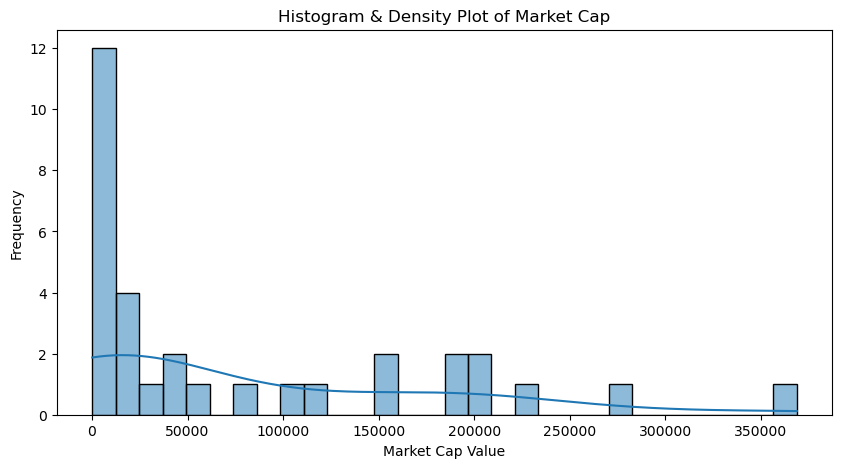

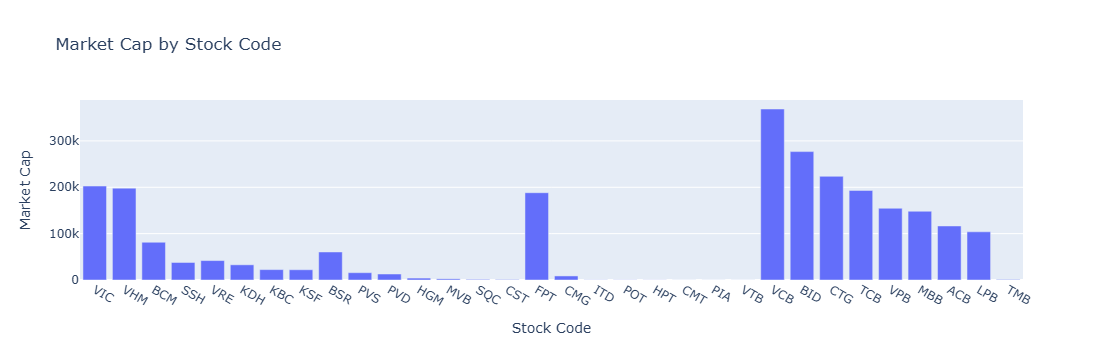

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Vẽ histogram và đường phân phối
plt.figure(figsize=(10, 5))
sns.histplot(market_cap['value'], bins=30, kde=True)
plt.xlabel("Market Cap Value")
plt.ylabel("Frequency")
plt.title("Histogram & Density Plot of Market Cap")
plt.show()

# Vẽ biểu đồ cột có thể tương tác
fig = px.bar(market_cap, x='stock_code', y='value', title="Market Cap by Stock Code", labels={'value': 'Market Cap', 'stock_code': 'Stock Code'})
fig.show()


In [308]:
#Lọc dữ liệu trong khoảng thời gian 2022-2024
df_filtered_time = df_quarterly[
    (df_quarterly["transaction_date"] >= "2022-01-01") &
    (df_quarterly["transaction_date"] <= "2024-12-31")
]

# Tìm danh sách các mã cổ phiếu thỏa mãn điều kiện
valid_stock_codes = df_filtered_time.groupby("stock_code").filter(
    lambda x: x["matched_volume"]["sum"].min() > 500 and x["closing_price"]["mean"].min() > 0 
)["stock_code"].unique()

# Lọc các mã có market_cap['value'] > 500
valid_market_cap_codes = market_cap[market_cap["value"] > 300]["stock_code"].unique()

# Lấy giao của hai tập hợp mã cổ phiếu hợp lệ
final_valid_stock_codes = set(valid_stock_codes) & set(valid_market_cap_codes)

# Giữ lại các dòng trong df_quarterly có stock_code hợp lệ
df_result = df_quarterly[df_quarterly["stock_code"].isin(final_valid_stock_codes)]

df_result


stock_code transaction_date closing_price             matched_volume  \
                                           sum        mean            sum   
0           ACB       2006-12-31       3240.60  140.895652        1279000   
1           ACB       2007-03-31      12525.40  215.955172        4949400   
2           ACB       2007-06-30      11051.20  181.167213        5993900   
3           ACB       2007-09-30       7859.00  122.796875       10180700   
4           ACB       2007-12-31      11044.20  169.910769       19209600   
...         ...              ...           ...         ...            ...   
1438        VRE       2024-03-31       1453.25   24.631356      597641700   
1439        VRE       2024-06-30       1371.85   22.489344      497187100   
1440        VRE       2024-09-30       1238.10   19.345312      675530500   
1441        VRE       2024-12-31       1186.85   17.982576      410681800   
1442        VRE       2025-03-31        823.75   17.161458      381613100   

                    
              mean  
0     5.560870e+04  
1     8.533448e+04  
2     9.826066e+04  
3     1.590734e+05  
4     2.955323e+05  
...            ...  
1438  1.012952e+07  
1439  8.150608e+06  
1440  1.055516e+07  
1441  6.222452e+06  
1442  7.950273e+06  

[1244 rows x 6 columns]

In [309]:
df_result['stock_code'].unique().size

25

In [315]:
his_cost = his_cost[his_cost['stock_code'].isin(final_valid_stock_codes)].reset_index()
his_cost

index transaction_date  closing_price  change  matched_volume  \
0          0       2006-11-21         135.00   15.00           56500   
1          1       2006-11-22         135.00    4.80           62300   
2          2       2006-11-23         143.00    8.30           69900   
3          3       2006-11-27         142.00   -4.80           42400   
4          4       2006-11-28         142.00   -4.80           19800   
...      ...              ...            ...     ...             ...   
76246  88201       2025-03-12          18.30    0.10        11789600   
76247  88202       2025-03-13          18.80    0.50        29808500   
76248  88203       2025-03-14          18.75   -0.05        11422100   
76249  88204       2025-03-17          18.70   -0.05         9392000   
76250  88205       2025-03-18          18.45   -0.25        12489700   

       matched_value  negotiated_volume  negotiated_value  opening_price  \
0               7.37                  0              0.00         120.00   
1               8.39                  0              0.00         143.20   
2               9.68                  0              0.00         145.00   
3               6.23                  0              0.00         146.80   
4               2.84                  0              0.00         150.00   
...              ...                ...               ...            ...   
76246         215.96            1425000             27.65          18.20   
76247         561.82                  0              0.00          18.30   
76248         215.59                  0              0.00          18.90   
76249         175.60                  0              0.00          18.65   
76250         232.19                 52              0.00          18.70   

       highest_price  lowest_price  percent stock_code  
0             150.00        119.00    12.50        ACB  
1             143.20        130.00     3.69        ACB  
2             145.00        130.00     6.16        ACB  
3             161.40        135.00    -3.27        ACB  
4             150.00        140.00    -3.27        ACB  
...              ...           ...      ...        ...  
76246          18.45         18.15     0.55        VRE  
76247          19.20         18.25     2.73        VRE  
76248          19.10         18.70    -0.27        VRE  
76249          18.80         18.60    -0.27        VRE  
76250          18.80         18.40    -1.34        VRE  

[76251 rows x 13 columns]

##### Phân phối của (percent)
Không biết cột percent và biến động giá có phải là 1 không?


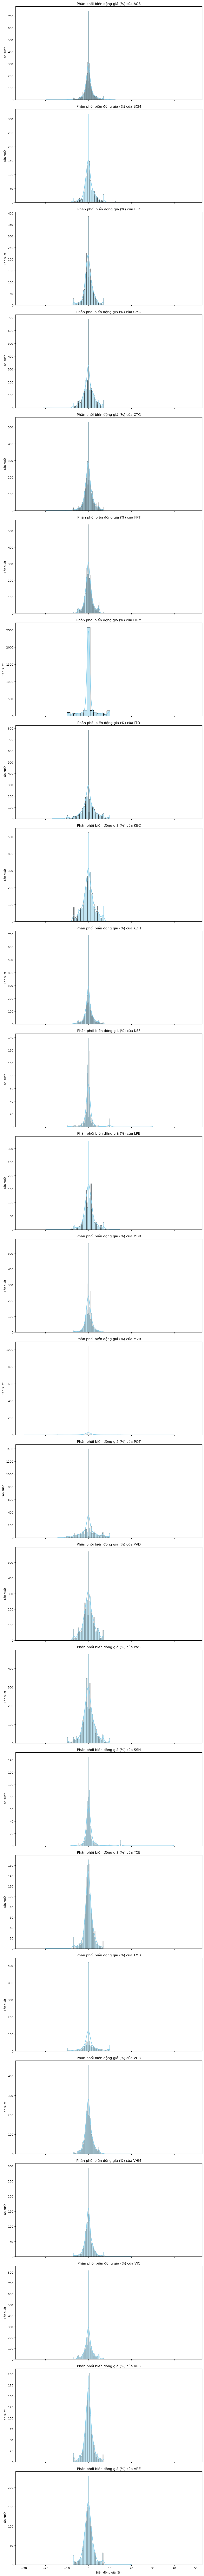

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Lấy danh sách các mã cổ phiếu duy nhất
stock_codes = his_cost['stock_code'].unique()
n_stocks = len(stock_codes)

# Thiết lập figure với mỗi mã trên một hàng
fig, axes = plt.subplots(n_stocks, 1, figsize=(10, 5 * n_stocks), sharex=True)

# Nếu chỉ có 1 mã, axes không phải là mảng, cần xử lý riêng
if n_stocks == 1:
    axes = [axes]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i, stock in enumerate(stock_codes):
    # Lọc dữ liệu cho mã cổ phiếu hiện tại
    stock_data = his_cost[his_cost['stock_code'] == stock]
    
    # Vẽ histogram và đường mật độ
    sns.histplot(stock_data['percent'], kde=True, ax=axes[i], color='skyblue')
    
    # Đặt tiêu đề và nhãn
    axes[i].set_title(f'Phân phối biến động giá (%) của {stock}')
    axes[i].set_xlabel('Biến động giá (%)')
    axes[i].set_ylabel('Tần suất')

# Điều chỉnh layout và hiển thị
plt.tight_layout()
plt.show()

## Phân phối biến động lợi nhuận

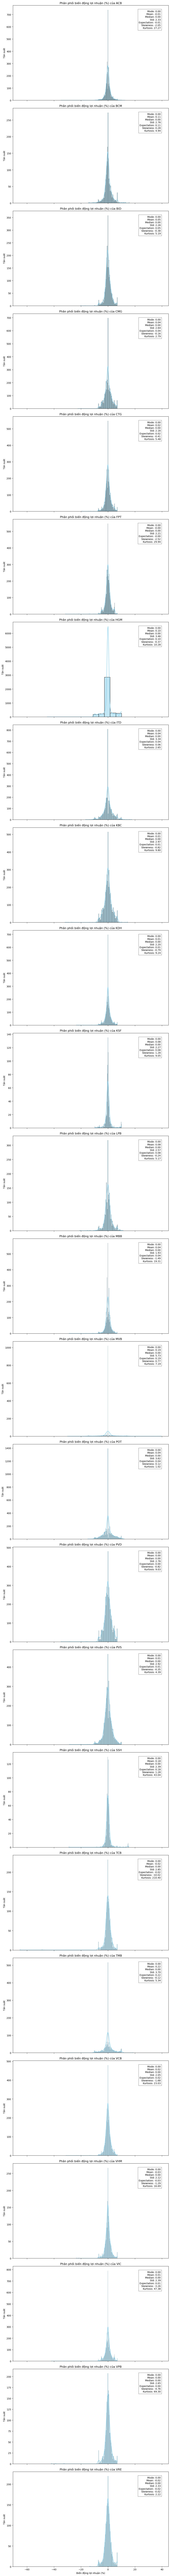

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dữ liệu mẫu (thay bằng dữ liệu thực tế của bạn)

# Chuyển đổi transaction_date thành định dạng datetime
his_cost['transaction_date'] = pd.to_datetime(his_cost['transaction_date'])

# Sắp xếp dữ liệu theo stock_code và transaction_date
his_cost = his_cost.sort_values(by=['stock_code', 'transaction_date'])

# Tính daily_return (biến động lợi nhuận hàng ngày)
his_cost['daily_return'] = his_cost.groupby('stock_code')['closing_price'].pct_change() * 100

# Loại bỏ các giá trị NaN trong daily_return (ngày đầu tiên của mỗi mã)
his_cost = his_cost.dropna(subset=['daily_return'])

# Lấy danh sách các mã cổ phiếu duy nhất
stock_codes = his_cost['stock_code'].unique()
n_stocks = len(stock_codes)

# Thiết lập figure với mỗi mã trên một hàng
fig, axes = plt.subplots(n_stocks, 1, figsize=(10, 6 * n_stocks), sharex=True)

# Nếu chỉ có 1 mã, axes không phải là mảng
if n_stocks == 1:
    axes = [axes]

# Vẽ biểu đồ và tính thống kê cho từng mã cổ phiếu
for i, stock in enumerate(stock_codes):
    # Lọc dữ liệu cho mã cổ phiếu hiện tại
    stock_data = his_cost[his_cost['stock_code'] == stock]
    returns = stock_data['daily_return']
    
    # Vẽ histogram và đường mật độ
    sns.histplot(returns, kde=True, ax=axes[i], color='skyblue')
    
    # Tính các thống kê
    mode = stats.mode(returns, keepdims=True)[0][0]  # Mode đầu tiên nếu có nhiều mode
    mean = returns.mean()
    median = returns.median()
    std = returns.std()
    expectation = mean  # Kỳ vọng là mean
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    
    # Chuẩn bị văn bản thống kê để hiển thị
    stats_text = (f'Mode: {mode:.2f}\n'
                  f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'Std: {std:.2f}\n'
                  f'Expectation: {expectation:.2f}\n'
                  f'Skewness: {skewness:.2f}\n'
                  f'Kurtosis: {kurtosis:.2f}')
    
    # Hiển thị thống kê trên biểu đồ
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, 
                 verticalalignment='top', horizontalalignment='right', 
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Đặt tiêu đề và nhãn
    axes[i].set_title(f'Phân phối biến động lợi nhuận (%) của {stock}')
    axes[i].set_xlabel('Biến động lợi nhuận (%)')
    axes[i].set_ylabel('Tần suất')

# Điều chỉnh layout và hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Lọc theo CAGR ( E đang để là 2018->thời gian dự đoán, ở đây ví dụ là 2023)

In [318]:
import pandas as pd

# Chuyển đổi transaction_date về dạng datetime
his_cost['transaction_date'] = pd.to_datetime(his_cost['transaction_date'])

# Bước 1: Lọc những mã có min(transaction_date) <= 2018-01-01
listed_before_2018 = his_cost.groupby('stock_code')['transaction_date'].min() <= '2018-01-01'
valid_stocks = listed_before_2018[listed_before_2018].index

# Bước 2: Giữ lại dữ liệu từ 2018 đến 02/2025
his_cost_filtered = his_cost[
    (his_cost['stock_code'].isin(valid_stocks)) &
    (his_cost['transaction_date'] >= '2018-01-01') &
    (his_cost['transaction_date'] <= '2025-02-28')
]

# Bước 3: Lọc dữ liệu từ 2018-2023 để tính CAGR
his_cost_cagr = his_cost_filtered[
    (his_cost_filtered['transaction_date'] >= '2018-01-01') &
    (his_cost_filtered['transaction_date'] <= '2023-12-31')
]

# Hàm tính CAGR từ 2018 đến 2023
def calculate_cagr(df):
    if df.empty:
        return None  # Trả về None nếu không có dữ liệu hợp lệ

    V_begin = df['closing_price'].iloc[0]
    V_end = df['closing_price'].iloc[-1]

    start_date = df['transaction_date'].iloc[0]
    end_date = df['transaction_date'].iloc[-1]
    n = (end_date - start_date).days / 365.25

    if n > 0 and V_begin > 0:
        cagr = (V_end / V_begin) ** (1 / n) - 1
    else:
        cagr = None  # Nếu không thể tính, trả về None
    
    return cagr * 100  # Trả về dưới dạng phần trăm

# Tính CAGR cho từng mã từ 2018-2023
cagr_by_stock = his_cost_cagr.groupby('stock_code').apply(calculate_cagr).dropna()
cagr_by_stock




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29476\4249999702.py:43: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



stock_code
ACB    -7.773542
BID     8.249280
CMG     7.443752
CTG     1.390073
FPT     8.244960
HGM    -0.767640
ITD    -5.798816
KBC    15.140357
KDH     2.301847
LPB     3.256670
MBB    -5.727914
MVB    26.778317
POT    -3.467519
PVD     3.523906
PVS     8.747030
VCB     6.524255
VIC    -8.951865
VPB   -12.699962
VRE   -11.168490
dtype: float64

In [326]:
# Bước 4: Lọc chỉ giữ lại các mã có CAGR > 0
valid_cagr_stocks = cagr_by_stock[cagr_by_stock > -10].index

# Bước 5: Giữ lại dữ liệu từ 2018-2025 của các mã có CAGR > 0
final_data = his_cost_filtered[his_cost_filtered['stock_code'].isin(valid_cagr_stocks)]

his_cost = final_data

In [347]:
list_stock1 = his_cost['stock_code'].unique() # danh sach cac ma co phieu qua bo loc 1
his_cost['stock_code'].unique().size

17

## Cổ phiếu còn lại sau khi qua lọc 1 :

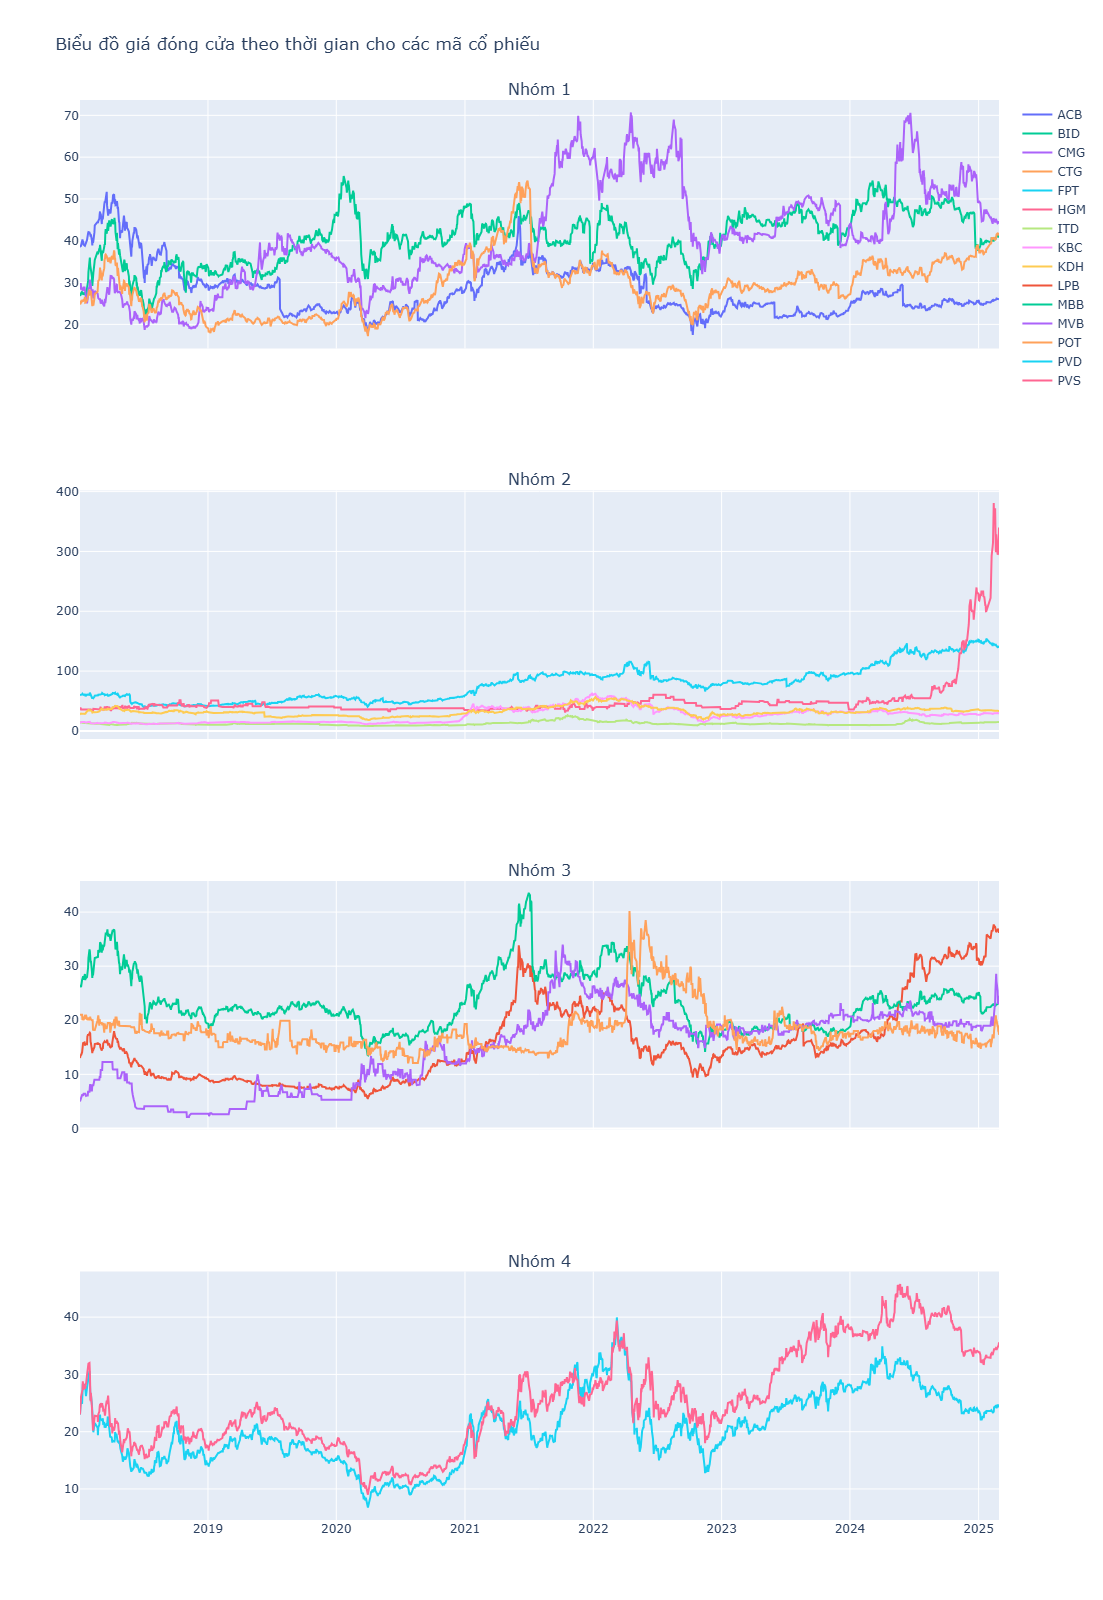

In [328]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
n_groups = 4
group_size = 5
# Tạo subplot với số hàng bằng số nhóm
fig = make_subplots(rows=n_groups, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=[f'Nhóm {i+1}' for i in range(n_groups)])

# Chia mã cổ phiếu thành các nhóm và vẽ biểu đồ
for i in range(n_groups):
    start_idx = i * group_size
    end_idx = min(start_idx + group_size, n_stocks)
    group_stocks = stock_codes[start_idx:end_idx]
    
    # Lọc dữ liệu cho nhóm mã cổ phiếu hiện tại
    group_data = his_cost[his_cost['stock_code'].isin(group_stocks)]
    
    # Vẽ đường giá đóng cửa cho từng mã trong nhóm
    for stock in group_stocks:
        stock_data = group_data[group_data['stock_code'] == stock]
        fig.add_trace(
            go.Scatter(x=stock_data['transaction_date'], 
                       y=stock_data['closing_price'], 
                       mode='lines', 
                       name=stock),
            row=i+1, col=1
        )

# Cập nhật giao diện biểu đồ
fig.update_layout(
    height=400 * n_groups,  # Chiều cao phụ thuộc số nhóm
    width=1000,
    title_text="Biểu đồ giá đóng cửa theo thời gian cho các mã cổ phiếu",
    showlegend=True,
    hovermode='x unified'  # Hiển thị giá trị khi di chuột
)

# Hiển thị biểu đồ
fig.show()

# Bộ lọc 2 (fundamental indicators)


In [2]:
df2 = pd.read_csv(r"/home/hamornic/FinalXXX/Financial Report Processed/cstc_v2.csv", low_memory=False, index_col=0)
df2.head(10)

period_1 Unnamed: 2  \
Chỉ số tài chính                                                         
Chỉ số tài chính - ACB                                 2003        NaN   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  3116.88        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   13267        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    46.99          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     2.43          %   
Chỉ số tài chính - ACB                                 2004        NaN   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4449.68        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   14757        VNĐ   

                                                   stock_code   Năm  
Chỉ số tài chính                                                     
Chỉ số tài chính - ACB                                    ACB  2003  
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2003  
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2003  
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2003  
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2003  
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2003  
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2003  
Chỉ số tài chính - ACB                                    ACB  2004  
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2004  
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2004

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6147 entries, Chỉ số tài chính - ACB to Tỷ số Nợ vay trên Vốn chủ sở hữu
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   period_1    6123 non-null   object
 1   Unnamed: 2  5514 non-null   object
 2   stock_code  6147 non-null   object
 3   Năm         6147 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 240.1+ KB


In [4]:
df2['fa'] = df2.index
df2.reset_index(drop=True)
df2 = df2.dropna()
df2['fa'].unique()

array(['Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)',
       'Giá trị sổ sách của cổ phiếu (BVPS)',
       'Chỉ số giá thị trường trên thu nhập (P/E)',
       'Chỉ số giá thị trường trên giá trị sổ sách (P/B)',
       'Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân (ROEA)',
       'Tỷ suất sinh lợi trên tổng tài sản bình quân (ROAA)',
       'Tỷ suất lợi nhuận gộp biên',
       'Tỷ suất sinh lợi trên doanh thu thuần',
       'Tỷ số thanh toán hiện hành (ngắn hạn)',
       'Khả năng thanh toán lãi vay', 'Tỷ số Nợ trên Tổng tài sản',
       'Tỷ số Nợ vay trên Vốn chủ sở hữu', 'Trailing EPS',
       'Book value per share (BVPS)', 'P/E', 'P/B', 'Gross profit margin',
       'Net profit margin', 'ROE', 'ROA', 'Short-term ratio',
       'Interest coverage', 'Liabilities to assets', 'Debt to equity'],
      dtype=object)

In [5]:
df2.isna().sum()

period_1      0
Unnamed: 2    0
stock_code    0
Năm           0
fa            0
dtype: int64

In [6]:
df2['stock_code'].unique().size

32

In [7]:
df2.head(20)

period_1 Unnamed: 2  \
Chỉ số tài chính                                                         
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  3116.88        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   13267        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    46.99          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     2.43          %   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4449.68        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   14757        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    33.65          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     1.63          %   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  3155.08        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   13531        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    30.02          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     1.51          %   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4594.61        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   15036        VNĐ   

                                                   stock_code   Năm  \
Chỉ số tài chính                                                      
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2003   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2003   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2003   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2003   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2003   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2003   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2004   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2004   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2004   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2004   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2004   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2004   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2005   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2005   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2005   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2005   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2005   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2005   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2006   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2006   

                                                                                                   fa  
Chỉ số tài chính                                                                                       
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  Thu nhập trên mỗi cổ phần của 4 quý gần nhất (...  
Giá trị sổ sách của cổ phiếu (BVPS)                               Giá trị sổ sách của cổ phiếu (BVPS)  
Chỉ số giá thị trường trên thu nhập (P/E)                   Chỉ số giá thị trường trên thu nhập (P/E)  
Chỉ số giá thị trường trên giá trị sổ sách (P/B)     Chỉ số giá thị trường trên giá trị sổ sách (P/B)  
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...  Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quâ...  
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...  Tỷ suất sinh lợi trên tổng tài sản bình quân (...  
Thu nhập trên mỗi cổ phần c

### Chỉ giữ lại các mã đã qua bộ lọc 1

In [357]:
df2 = df2[df2['stock_code'].isin(list_stock1)]
df2['stock_code'].unique()

array(['ACB', 'BID', 'CMG', 'CTG', 'FPT', 'HGM', 'ITD', 'KBC', 'KDH',
       'LPB', 'MBB', 'MVB', 'POT', 'PVD', 'PVS', 'VCB', 'VIC'],
      dtype=object)

In [8]:
df2 = df2.reset_index()
df2 = df2.drop(columns =['Chỉ số tài chính','Unnamed: 2'])

In [9]:
# Giả sử df2 đã được load
# Trích xuất nội dung trong dấu ngoặc
df2['fa_extracted'] = df2['fa'].str.extract(r'\((.*?)\)')

# Chỉ giữ lại những dòng có giá trị được trích xuất (không phải NaN)
df2 = df2[df2['fa_extracted'].notna()].copy()

# Gán lại cột 'fa' bằng giá trị trong 'fa_extracted'
df2['fa'] = df2['fa_extracted']

# Loại bỏ cột tạm 'fa_extracted'
df2 = df2.drop(columns=['fa_extracted'])

# Kiểm tra kết quả
df2['fa'].unique()

array(['EPS', 'BVPS', 'P/E', 'P/B', 'ROEA', 'ROAA', 'ngắn hạn'],
      dtype=object)

### Lấy các chỉ số FA trong các năm gần đây, ví dụ là từ 2018->tgian dự đoán.

In [10]:
df2['period_1'] = pd.to_numeric(df2['period_1'], errors='coerce')
df2 = df2.rename(columns={'Năm': 'year'})
df2['year'] = pd.to_datetime(df2['year'], format='%Y')
df2_filtered = df2[(df2['year'] >= pd.Timestamp('2018-01-01')) & (df2['year'] <= pd.Timestamp('2023-12-31'))].reset_index()
nan_count = df2['period_1'].isna().sum()
nan_count

np.int64(0)

In [11]:
df2_filtered

index  period_1 stock_code       year        fa
0        90   4671.18        ACB 2018-01-01       EPS
1        91  16852.54        ACB 2018-01-01      BVPS
2        92      6.33        ACB 2018-01-01       P/E
3        93      1.76        ACB 2018-01-01       P/B
4        94     27.73        ACB 2018-01-01      ROEA
...     ...       ...        ...        ...       ...
1225   5470     14.30        VTB 2023-01-01       P/E
1226   5471      0.83        VTB 2023-01-01       P/B
1227   5474      5.78        VTB 2023-01-01      ROEA
1228   5475      4.65        VTB 2023-01-01      ROAA
1229   5476      5.51        VTB 2023-01-01  ngắn hạn

[1230 rows x 5 columns]

### Tính các chỉ số Fa, sử dụng EMA, các năm gần đây sẽ có trọng số cao hơn.

In [12]:
import pandas as pd

# 1. Lọc bỏ các dòng có 'fa' = 'ngắn hạn'
df2_filtered = df2[df2['fa'] != 'ngắn hạn'].copy()

# 2. Kiểm tra mỗi stock_code xem có đủ các chỉ số không
required_set = {'EPS', 'BVPS', 'P/E', 'P/B', 'ROEA', 'ROAA'}
missing_fa = {}

for stock in df2_filtered['stock_code'].unique():
    fa_values = set(df2_filtered.loc[df2_filtered['stock_code'] == stock, 'fa'].unique())
    missing = required_set - fa_values
    if missing:
        missing_fa[stock] = missing

print("Các mã cổ phiếu thiếu các chỉ số tài chính:")
print(missing_fa)

# 3. Chuyển đổi 'year' về datetime để sắp xếp dữ liệu theo thời gian
df2_filtered['year'] = pd.to_datetime(df2_filtered['year'])

# 4. Tính EMA cho mỗi nhóm (stock_code, fa)
df2_filtered.sort_values(by=['stock_code', 'fa', 'year'], inplace=True)

df2_filtered['period_ema'] = df2_filtered.groupby(['stock_code', 'fa'])['period_1'].transform(
    lambda x: x.ewm(span=3, adjust=False).mean()  # EMA với cửa sổ 3 năm
)

# 5. Pivot bảng với giá trị EMA
pivoted = df2_filtered[df2_filtered['fa'].isin(required_set)].pivot_table(
    index='stock_code',
    columns='fa',
    values='period_ema',  # Dùng giá trị EMA thay vì giá trị gốc
    aggfunc='mean'
)

# 6. Kiểm tra NaN trong các cột
print("Kết quả pivot (các chỉ số tài chính):")
print(pivoted.head())

print("Số lượng giá trị NaN ở mỗi cột:")
print(pivoted.isna().sum())


Các mã cổ phiếu thiếu các chỉ số tài chính:
{'HPT': {'P/B', 'EPS', 'ROAA', 'ROEA', 'P/E'}}
Kết quả pivot (các chỉ số tài chính):
fa                  BVPS          EPS       P/B        P/E      ROAA  \
stock_code                                                             
ACB         15028.358688  3575.201359  0.589275   8.296154  1.544404   
BCM         15155.937277  7626.983285  1.510827  14.078431  2.665144   
BID         16152.657074  2023.442360  0.801989   5.823628  0.697492   
BSR         11381.985372  1225.288487  0.532212   6.558101  4.793333   
CMG         15405.367109  1240.136807  0.760325  13.441314  3.548361   

fa               ROEA  
stock_code             
ACB         24.770775  
BCM          8.862902  
BID         13.198344  
BSR          8.289167  
CMG          7.853878  
Số lượng giá trị NaN ở mỗi cột:
fa
BVPS    0
EPS     1
P/B     1
P/E     1
ROAA    1
ROEA    1
dtype: int64


In [388]:
columns_to_check = ['BVPS','EPS', 'P/B', 'P/E', 'ROAA', 'ROEA']
pivoted = pivoted.dropna(subset=columns_to_check)
pivoted

fa                  BVPS           EPS       P/B        P/E       ROAA  \
stock_code                                                               
ACB         15028.358688   3575.201359  0.589275   8.296154   1.544404   
BID         16152.657074   2023.442360  0.801989   5.823628   0.697492   
CMG         15405.367109   1240.136807  0.760325  13.441314   3.548361   
CTG         16447.742783   2076.702011  0.787202   6.022866   0.778008   
FPT         21529.413683   6145.002458  3.212528  12.273211  12.260353   
HGM         26508.398820  12189.456562  1.168960  14.531703  34.759754   
ITD         17113.185187   2193.697450  0.369183   7.725994   6.370081   
KBC         18857.539418   1662.993860  1.123857  21.613003   5.009593   
KDH         20065.268241   1262.000291  1.022392  12.970169   3.966568   
LPB         12401.468936   1716.480278  0.419465   2.543467   2.616290   
MBB         14946.813208   2604.066373  0.662227   3.811772   1.829959   
MVB         15255.156623   1658.555117  0.600186   6.278068   4.848695   
POT         15551.214514    988.504990  0.438977  21.292402   2.340920   
PVD         28390.231386   3827.474405  0.920220  49.506257   7.944553   
PVS         23662.354628   3246.133794  0.349248   9.535982   5.320160   
VCB         20086.032902   3351.369173  1.667928   9.456751   1.157395   
VIC         22601.081750   3090.740005  3.179126  27.087800   9.198754   

fa               ROEA  
stock_code             
ACB         24.770775  
BID         13.198344  
CMG          7.853878  
CTG         13.552703  
FPT         37.832355  
HGM         49.535891  
ITD         15.905522  
KBC         10.402882  
KDH          6.810629  
LPB         15.427801  
MBB         19.677183  
MVB         11.486730  
POT          6.477160  
PVD         22.162582  
PVS         17.837580  
VCB         18.138860  
VIC         22.072206

In [393]:
import pandas as pd

# Giả sử pivoted là DataFrame ban đầu, có index là stock_code và các cột chỉ số:
# ['BVPS', 'EPS', 'P/E', 'P/B', 'ROAA', 'ROEA']
df = pivoted.reset_index()

# Danh sách các cột chỉ số
indicator_cols = ['BVPS', 'EPS', 'P/E', 'P/B', 'ROAA', 'ROEA']

# Định nghĩa trọng số cho từng chỉ số dựa trên ý nghĩa thực tế
weights = {
    'BVPS': 0.25,  # Nội lực, giá trị sổ sách cao → tốt
    'EPS': 0.25,   # Sinh lời cao → tốt
    'P/E': 0.15,   # Định giá hấp dẫn: thấp hơn → tốt
    'P/B': 0.15,   # Định giá hấp dẫn: thấp hơn → tốt
    'ROAA': 0.10,  # Sinh lời trên tài sản → càng cao càng tốt
    'ROEA': 0.10   # Sinh lời trên vốn chủ sở hữu → càng cao càng tốt
}

# Định nghĩa thứ tự xếp hạng cho từng chỉ số: True nếu muốn xếp theo thứ tự tăng dần, False nếu giảm dần
rank_order = {
    'BVPS': False,  # Giá trị cao hơn → xếp hạng cao (rank 1 là tốt nhất)
    'EPS': False,   # Giá trị cao hơn → xếp hạng cao
    'P/E': True,    # Giá trị thấp hơn → xếp hạng cao
    'P/B': True,    # Giá trị thấp hơn → xếp hạng cao
    'ROAA': False,  # Giá trị cao hơn → xếp hạng cao
    'ROEA': False   # Giá trị cao hơn → xếp hạng cao
}

# Tạo các cột rank cho từng chỉ số sử dụng phương pháp "dense"
for col in indicator_cols:
    df[col + '_rank'] = df[col].rank(method='dense', ascending=rank_order[col])
    df[col + '_rank'] = df[col + '_rank'].astype(int)

# Tính tổng điểm có trọng số (weighted sum) cho từng mã cổ phiếu
# Lưu ý: Vì thứ hạng tốt nhất là số nhỏ, nên tổng điểm thấp hơn sẽ tốt hơn.
df['weighted_sum'] = sum(df[col + '_rank'] * weights[col] for col in indicator_cols)

# Tính final_rank dựa trên weighted_sum: rank thấp hơn (tốt hơn) nhận thứ hạng cao hơn.
df['final_rank'] = df['weighted_sum'].rank(method='dense', ascending=True).astype(int)

# Sắp xếp và hiển thị kết quả
result = df[['stock_code'] + indicator_cols + [col + '_rank' for col in indicator_cols] + ['weighted_sum', 'final_rank']]
result = result.sort_values('final_rank')
print(result.head(10))


fa stock_code          BVPS           EPS        P/E       P/B       ROAA  \
5         HGM  26508.398820  12189.456562  14.531703  1.168960  34.759754   
14        PVS  23662.354628   3246.133794   9.535982  0.349248   5.320160   
13        PVD  28390.231386   3827.474405  49.506257  0.920220   7.944553   
4         FPT  21529.413683   6145.002458  12.273211  3.212528  12.260353   
6         ITD  17113.185187   2193.697450   7.725994  0.369183   6.370081   
0         ACB  15028.358688   3575.201359   8.296154  0.589275   1.544404   
16        VIC  22601.081750   3090.740005  27.087800  3.179126   9.198754   
15        VCB  20086.032902   3351.369173   9.456751  1.667928   1.157395   
10        MBB  14946.813208   2604.066373   3.811772  0.662227   1.829959   
3         CTG  16447.742783   2076.702011   6.022866  0.787202   0.778008   

fa       ROEA  BVPS_rank  EPS_rank  P/E_rank  P/B_rank  ROAA_rank  ROEA_rank  \
5   49.535891          2         1        13        14          1       

## Sau khi ranking

In [394]:
df

fa stock_code          BVPS           EPS       P/B        P/E       ROAA  \
0         ACB  15028.358688   3575.201359  0.589275   8.296154   1.544404   
1         BID  16152.657074   2023.442360  0.801989   5.823628   0.697492   
2         CMG  15405.367109   1240.136807  0.760325  13.441314   3.548361   
3         CTG  16447.742783   2076.702011  0.787202   6.022866   0.778008   
4         FPT  21529.413683   6145.002458  3.212528  12.273211  12.260353   
5         HGM  26508.398820  12189.456562  1.168960  14.531703  34.759754   
6         ITD  17113.185187   2193.697450  0.369183   7.725994   6.370081   
7         KBC  18857.539418   1662.993860  1.123857  21.613003   5.009593   
8         KDH  20065.268241   1262.000291  1.022392  12.970169   3.966568   
9         LPB  12401.468936   1716.480278  0.419465   2.543467   2.616290   
10        MBB  14946.813208   2604.066373  0.662227   3.811772   1.829959   
11        MVB  15255.156623   1658.555117  0.600186   6.278068   4.848695   
12        POT  15551.214514    988.504990  0.438977  21.292402   2.340920   
13        PVD  28390.231386   3827.474405  0.920220  49.506257   7.944553   
14        PVS  23662.354628   3246.133794  0.349248   9.535982   5.320160   
15        VCB  20086.032902   3351.369173  1.667928   9.456751   1.157395   
16        VIC  22601.081750   3090.740005  3.179126  27.087800   9.198754   

fa       ROEA  BVPS_rank  EPS_rank  P/E_rank  P/B_rank  ROAA_rank  ROEA_rank  \
0   24.770775         15         4         7         5         14          3   
1   13.198344         11        11         3        10         17         12   
2    7.853878         13        16        12         8         10         15   
3   13.552703         10        10         4         9         16         11   
4   37.832355          5         2        10        17          2          2   
5   49.535891          2         1        13        14          1          1   
6   15.905522          9         9         6         2          5          9   
7   10.402882          8        13        15        13          7         14   
8    6.810629          7        15        11        12          9         16   
9   15.427801         17        12         1         3         11         10   
10  19.677183         16         8         2         7         13          6   
11  11.486730         14        14         5         6          8         13   
12   6.477160         12        17        14         4         12         17   
13  22.162582          1         3        17        11          4          4   
14  17.837580          3         6         9         1          6          8   
15  18.138860          6         5         8        15         15          7   
16  22.072206          4         7        16        16          3          5   

fa  weighted_sum  final_rank  
0           8.25           6  
1          10.35          12  
2          12.75          16  
3           9.65          10  
4           6.20           4  
5           5.00           1  
6           7.10           5  
7          11.55          15  
8          11.45          14  
9           9.95          11  
10          9.25           9  
11         10.75          13  
12         12.85          17  
13          6.00           3  
14          5.15           2  
15          8.40           8  
16          8.35           7

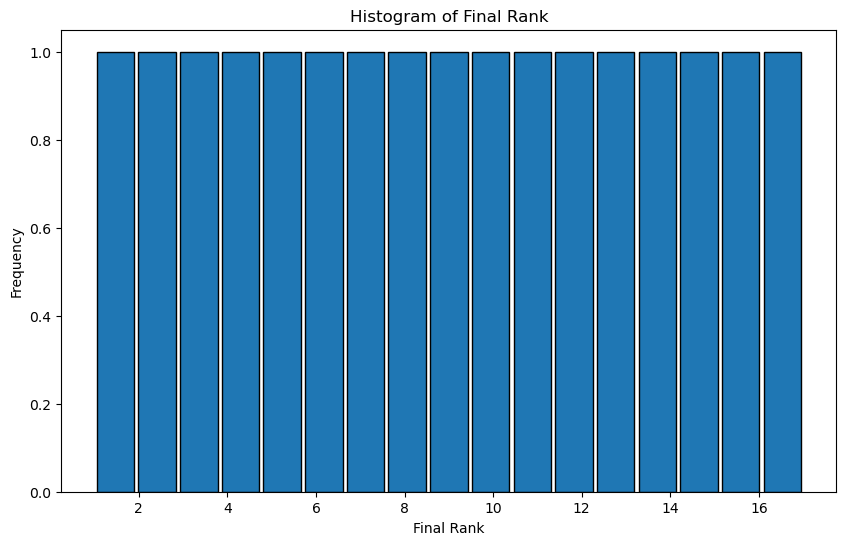

In [400]:
import matplotlib.pyplot as plt

# Sắp xếp df theo final_rank tăng dần
df = df.sort_values(by='final_rank')

# Vẽ histogram cho final_rank
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['final_rank'], bins=df_sorted['final_rank'].nunique(), edgecolor='k', rwidth=0.9)
plt.xlabel('Final Rank')
plt.ylabel('Frequency')
plt.title('Histogram of Final Rank')
plt.show()


In [398]:
df['final_rank'].max()

17

### Danh sách các mã sau khi qua 2 bộ lọc, được sắp xếp theo final_rank

In [401]:
df

fa stock_code          BVPS           EPS       P/B        P/E       ROAA  \
5         HGM  26508.398820  12189.456562  1.168960  14.531703  34.759754   
14        PVS  23662.354628   3246.133794  0.349248   9.535982   5.320160   
13        PVD  28390.231386   3827.474405  0.920220  49.506257   7.944553   
4         FPT  21529.413683   6145.002458  3.212528  12.273211  12.260353   
6         ITD  17113.185187   2193.697450  0.369183   7.725994   6.370081   
0         ACB  15028.358688   3575.201359  0.589275   8.296154   1.544404   
16        VIC  22601.081750   3090.740005  3.179126  27.087800   9.198754   
15        VCB  20086.032902   3351.369173  1.667928   9.456751   1.157395   
10        MBB  14946.813208   2604.066373  0.662227   3.811772   1.829959   
3         CTG  16447.742783   2076.702011  0.787202   6.022866   0.778008   
9         LPB  12401.468936   1716.480278  0.419465   2.543467   2.616290   
1         BID  16152.657074   2023.442360  0.801989   5.823628   0.697492   
11        MVB  15255.156623   1658.555117  0.600186   6.278068   4.848695   
8         KDH  20065.268241   1262.000291  1.022392  12.970169   3.966568   
7         KBC  18857.539418   1662.993860  1.123857  21.613003   5.009593   
2         CMG  15405.367109   1240.136807  0.760325  13.441314   3.548361   
12        POT  15551.214514    988.504990  0.438977  21.292402   2.340920   

fa       ROEA  BVPS_rank  EPS_rank  P/E_rank  P/B_rank  ROAA_rank  ROEA_rank  \
5   49.535891          2         1        13        14          1          1   
14  17.837580          3         6         9         1          6          8   
13  22.162582          1         3        17        11          4          4   
4   37.832355          5         2        10        17          2          2   
6   15.905522          9         9         6         2          5          9   
0   24.770775         15         4         7         5         14          3   
16  22.072206          4         7        16        16          3          5   
15  18.138860          6         5         8        15         15          7   
10  19.677183         16         8         2         7         13          6   
3   13.552703         10        10         4         9         16         11   
9   15.427801         17        12         1         3         11         10   
1   13.198344         11        11         3        10         17         12   
11  11.486730         14        14         5         6          8         13   
8    6.810629          7        15        11        12          9         16   
7   10.402882          8        13        15        13          7         14   
2    7.853878         13        16        12         8         10         15   
12   6.477160         12        17        14         4         12         17   

fa  weighted_sum  final_rank  
5           5.00           1  
14          5.15           2  
13          6.00           3  
4           6.20           4  
6           7.10           5  
0           8.25           6  
16          8.35           7  
15          8.40           8  
10          9.25           9  
3           9.65          10  
9           9.95          11  
1          10.35          12  
11         10.75          13  
8          11.45          14  
7          11.55          15  
2          12.75          16  
12         12.85          17